# Importing Libraries

In [1]:
import pandas as pd
import numpy as np 

# *Importing Dataset*

In [65]:
data=pd.read_excel("C:\\Users\\Lenovo\\OneDrive\\Desktop\\customer_churn_large_dataset.xlsx")

## Data Study

In [66]:
data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [67]:
data['Name'].nunique()

100000

In [68]:
data.shape

(100000, 9)

In [69]:
data['Gender'].value_counts()

Female    50216
Male      49784
Name: Gender, dtype: int64

In [70]:
data['Location'].value_counts()

Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64

In [71]:
data['Subscription_Length_Months'].min()

1

In [72]:
data['Churn'].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

# Checking missing values

In [73]:
data.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

### We can see from above result that there are no missing values so no Imputation is required

In [74]:
data.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


### We can see from the above result:
#### For AGE : min age is 18 , max is 70 , avg is 44.
#### For Subscription_Length_Months: 
####  -> min subscription is for 1 month , max subscription is for 24 months ,average is for 12 months.
#### Monthly bill :
####  -> minimum bill is 30 , maximum bill is 100 , average bill is 65.
####  Data Usage :
#### -> max data usage is 500GB , minimum data usage is 50 , average data usage is 274.

# Converting categorical varibale into numerical

In [75]:
from sklearn import preprocessing

In [76]:
data.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

In [77]:
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
data['Gender']= label_encoder.fit_transform(data['Gender'])
  
data['Gender'].unique()

array([1, 0])

In [78]:
data['Location']= label_encoder.fit_transform(data['Location'])
  
data['Location'].unique()

array([2, 4, 3, 0, 1])

### Dropping column "Name" ,"CustomerID" as they are not required 

In [79]:
data = data.drop(['Name','CustomerID'],axis = 1)

In [80]:
data.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,1,2,17,73.36,236,0
1,62,0,4,1,48.76,172,0
2,24,0,2,5,85.47,460,0
3,36,0,3,3,97.94,297,1
4,46,0,3,19,58.14,266,0


# Checking outliers

In [81]:
import seaborn as sns

<Axes: xlabel='Churn', ylabel='Subscription_Length_Months'>

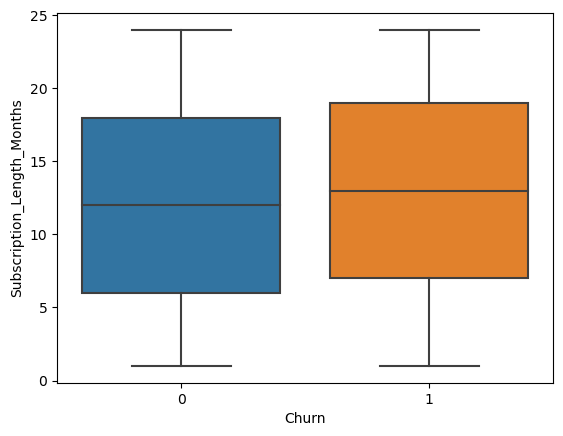

In [82]:
sns.boxplot(x = data.Churn, y = data.Subscription_Length_Months)

<Axes: xlabel='Churn', ylabel='Total_Usage_GB'>

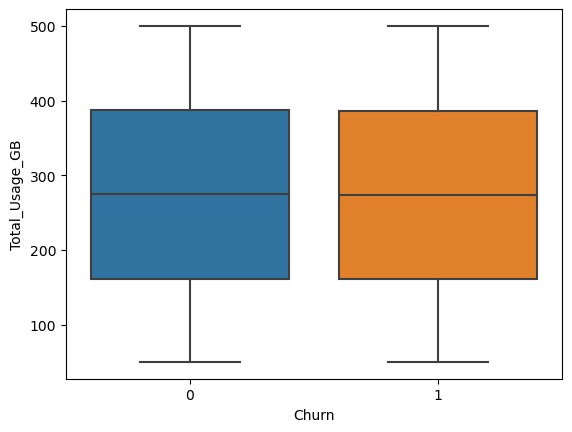

In [83]:
sns.boxplot(x = data.Churn, y = data.Total_Usage_GB)

# Feature Creation

In [84]:
data.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,1,2,17,73.36,236,0
1,62,0,4,1,48.76,172,0
2,24,0,2,5,85.47,460,0
3,36,0,3,3,97.94,297,1
4,46,0,3,19,58.14,266,0


In [85]:
data["Total_bill"] = data["Subscription_Length_Months"]*data["Monthly_Bill"]

In [86]:
data['Monthly data usage'] = data['Total_Usage_GB']/data['Subscription_Length_Months']

In [87]:
data.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Total_bill,Monthly data usage
0,63,1,2,17,73.36,236,0,1247.12,13.882353
1,62,0,4,1,48.76,172,0,48.76,172.000000
2,24,0,2,5,85.47,460,0,427.35,92.000000
3,36,0,3,3,97.94,297,1,293.82,99.000000
4,46,0,3,19,58.14,266,0,1104.66,14.000000


In [88]:
data = data.round(decimals = 2)

In [89]:
data

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Total_bill,Monthly data usage
0,63,1,2,17,73.36,236,0,1247.12,13.88
1,62,0,4,1,48.76,172,0,48.76,172.00
2,24,0,2,5,85.47,460,0,427.35,92.00
3,36,0,3,3,97.94,297,1,293.82,99.00
4,46,0,3,19,58.14,266,0,1104.66,14.00
...,...,...,...,...,...,...,...,...,...
99995,33,1,1,23,55.13,226,1,1267.99,9.83
99996,62,0,4,19,61.65,351,0,1171.35,18.47
99997,64,1,0,17,96.11,251,1,1633.87,14.76
99998,51,0,4,20,49.25,434,1,985.00,21.70


### Checking Correlation of the variables

In [90]:
data.corr()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Total_bill,Monthly data usage
Age,1.000000,0.000832,-0.005889,0.003382,0.001110,0.001927,0.001559,0.004375,-0.001419
Gender,0.000832,1.000000,-0.003314,0.000320,0.002239,-0.001385,0.002121,0.001353,0.001347
Location,-0.005889,-0.003314,1.000000,-0.001768,0.003716,0.002834,0.006405,0.000623,0.002010
Subscription_Length_Months,0.003382,0.000320,-0.001768,1.000000,-0.005294,-0.002203,0.002328,0.841891,-0.586065
Monthly_Bill,0.001110,0.002239,0.003716,-0.005294,1.000000,0.003187,-0.000211,0.466938,0.005304
Total_Usage_GB,0.001927,-0.001385,0.002834,-0.002203,0.003187,1.000000,-0.002842,0.000199,0.311101
Churn,0.001559,0.002121,0.006405,0.002328,-0.000211,-0.002842,1.000000,0.001325,0.000443
Total_bill,0.004375,0.001353,0.000623,0.841891,0.466938,0.000199,0.001325,1.000000,-0.493497
Monthly data usage,-0.001419,0.001347,0.002010,-0.586065,0.005304,0.311101,0.000443,-0.493497,1.000000


### Total bill is creating the problem of multicollinearity because of its high correlation with Subscription_Length_Months so we are dropping this feature.

In [91]:
data.drop(["Total_bill"], axis = 1, inplace = True)

In [92]:
data

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Monthly data usage
0,63,1,2,17,73.36,236,0,13.88
1,62,0,4,1,48.76,172,0,172.00
2,24,0,2,5,85.47,460,0,92.00
3,36,0,3,3,97.94,297,1,99.00
4,46,0,3,19,58.14,266,0,14.00
...,...,...,...,...,...,...,...,...
99995,33,1,1,23,55.13,226,1,9.83
99996,62,0,4,19,61.65,351,0,18.47
99997,64,1,0,17,96.11,251,1,14.76
99998,51,0,4,20,49.25,434,1,21.70


In [93]:
data.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Monthly data usage
0,63,1,2,17,73.36,236,0,13.88
1,62,0,4,1,48.76,172,0,172.00
2,24,0,2,5,85.47,460,0,92.00
3,36,0,3,3,97.94,297,1,99.00
4,46,0,3,19,58.14,266,0,14.00


In [94]:
X = data.drop(['Churn'],axis=1)
y = data['Churn'].values

# Scaling / Normalizing  

In [95]:
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

# Train Test Split

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#  Selecting Best Model Based On accuracy Score

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming you have your features (X) and labels (y) defined

# Split the data into training and testing sets
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
     'K-Nearest Neighbours': KNeighborsClassifier(),
    'Decision tree': DecisionTreeClassifier(),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} with accuracy: {accuracy}")

Logistic Regression with accuracy: 0.4963666666666667
Naive Bayes with accuracy: 0.4987333333333333
K-Nearest Neighbours with accuracy: 0.49716666666666665
Decision tree with accuracy: 0.4924


### Since all models have almost similiar accuracy and logistic model fits the outcome that I want for the problem statement so I am using Logistic model only which is a binary regression algorithm. and will give binary result for each customer, whether the customer will churn or not.

# Logistic regression model

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)
model.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

## Metrices For Checking Accuracy Of Model

In [100]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.4963666666666667


In [101]:
from sklearn.metrics import accuracy_score
print("Accuracy:", round(accuracy_score(y_test, prediction_test), 3))

Accuracy: 0.496


In [102]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, prediction_test, average='binary')
print('Precision: %.3f' % precision)

Precision: 0.491


# Parameter Fine Tunning (Method 1)

In [103]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [113]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4, 4, 9),
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

test_accuracy = best_model.score(X_test, y_test)

print("Best Hyperparameters:", best_params)
print("Test Accuracy:", test_accuracy)

Best Hyperparameters: {'C': 1000.0, 'penalty': 'l1', 'solver': 'saga'}
Test Accuracy: 0.49646666666666667


## Checking Accuracy,Precision,Recall,F-1 Score

In [121]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score

In [122]:
acc_score=accuracy_score(y_test,prediction_test)
acc_score

0.4963666666666667

In [123]:
pre_score=precision_score(y_test,prediction_test)
pre_score

0.49093747289914147

In [124]:
re_call=recall_score(y_test,prediction_test)
re_call

0.37993288590604024

In [125]:
f1_score=2*pre_score*re_call/(pre_score+re_call)
f1_score

0.42836063713064204

# Predicting by maually putting values

In [126]:
model.predict(np.array([63,1,2,17,73.36,236,13.88]).reshape(1,-1))

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

#  Deploying The Model

In [127]:
import pickle 
pickle.dump(model,open("C:/Users/Lenovo/OneDrive/Desktop/Churn_model.pkl",'wb'))